In [25]:
import requests
import numpy as np
import pandas as pd

In [26]:
from google.colab import files

In [27]:
uploaded=files.upload()

Saving EPL_20_21.csv to EPL_20_21 (1).csv


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
da=pd.read_csv("EPL_20_21.csv")

In [29]:
da.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [30]:
da.shape

(532, 18)

In [31]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [32]:
numerical=['Goals','Assists','Matches','Passes_Attempted']
da[numerical].describe()

,Goals,Assists,Matches,Passes_Attempted
count,532.000000,532.000000,532.000000,532.000000
mean,1.853383,1.287594,19.535714,717.750000
std,3.338009,2.095191,11.840459,631.372522
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,9.000000,171.500000
50%,1.000000,0.000000,21.000000,573.500000
75%,2.000000,2.000000,30.000000,1129.500000
max,23.000000,14.000000,38.000000,3214.000000


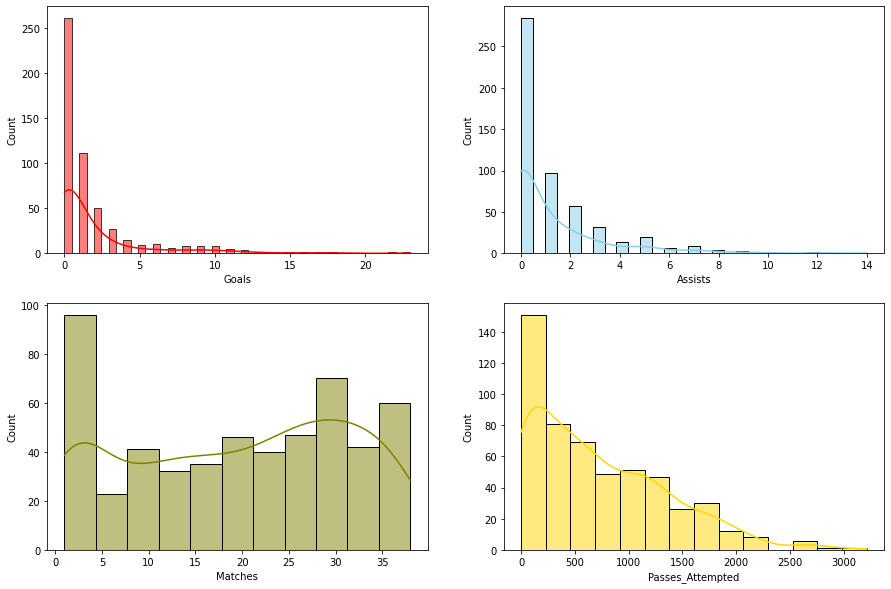

In [33]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=da,x="Goals",kde=True,color="red",ax=axs[0,0])
sns.histplot(data=da,x="Assists",kde=True,color="skyblue",ax=axs[0,1])
sns.histplot(data=da,x="Matches",kde=True,color="olive",ax=axs[1,0])
sns.histplot(data=da,x="Passes_Attempted",kde=True,color="gold",ax=axs[1,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

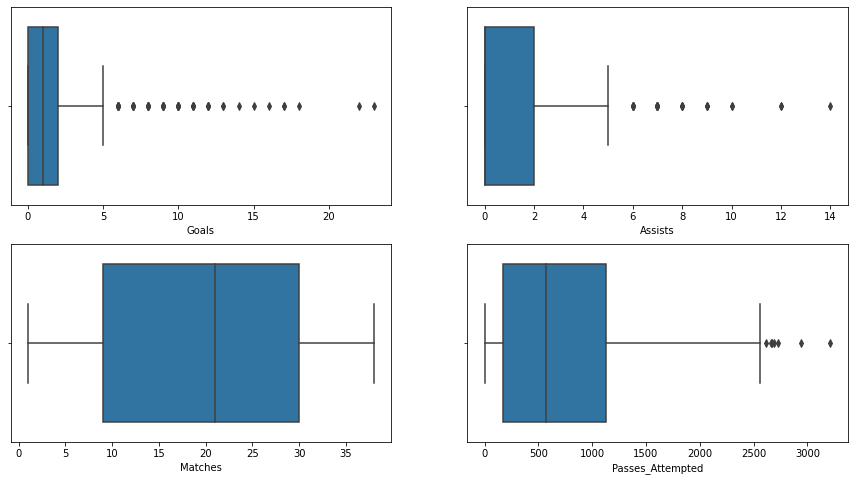

In [34]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(da['Goals'],ax=axs[0,0])
sns.boxplot(da['Assists'],ax=axs[0,1])
sns.boxplot(da['Matches'],ax=axs[1,0])
sns.boxplot(da['Passes_Attempted'],ax=axs[1,1])

In [35]:
#Goalws
qm25,qm50,qm75 = np.percentile(da['Goals'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= da[(da['Goals']>minm)&(da['Goals']< maxm )]

In [36]:
#Assists
qg25,qg50,qg75 = np.percentile(da['Assists'],[25,50,75])
iqrg = qg75 - qg25
maxg= qg75 + 1.5*iqrg
data = da[da['Assists']<maxg]

In [37]:
#Matches
qs25,qs50,qs75 = np.percentile(da['Matches'],[25,50,75])
iqrs = qs75 - qs25
maxs= qs75 + 1.5*iqrs
data= da[(da['Matches']< maxs )]

In [38]:
#Passes_Attempted
qo25,qo50,qo75 = np.percentile(da['Passes_Attempted'],[25,50,75])
iqro = qo75 - qo25
maxo = qo75 + 1.5*iqro
data= da[(da['Passes_Attempted']< maxo )]

In [39]:
data.shape

(525, 18)

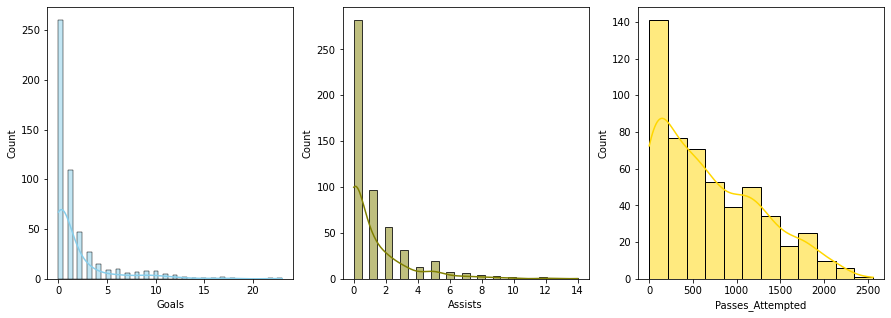

In [40]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="Goals", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="Assists", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="Passes_Attempted", kde=True, color="gold", ax=axs[2])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


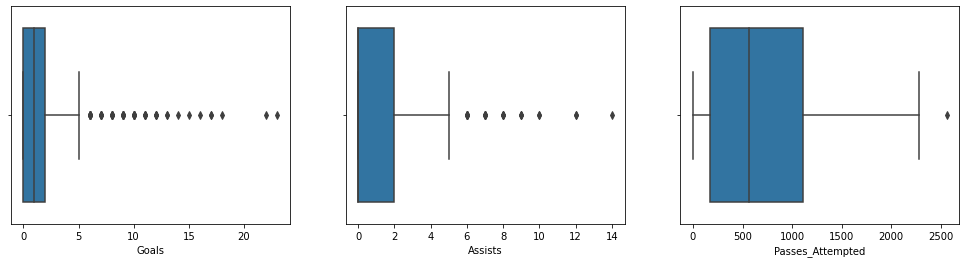

In [41]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['Goals'], ax = axs[0])
sns.boxplot(data['Assists'], ax = axs[1])
sns.boxplot(data['Passes_Attempted'], ax = axs[2])

plt.show()

In [42]:
data['Club'] = data['Club'].replace({1 : 'Chelsea', 2 : 'Manchester City',3 : 'Manchester United',4 : 'Liverpool FC',
                                     5 : 'Leicester City', 6: 'West Ham United',7: 'Tottenham Hotspurs',8: 'Arsenal',9: 'Leeds United',
                                     10: 'Everton',11: 'Aston Villa',12:'Newcastle United',13: 'Wolverhampton Wanderers',14: 'Crystal Palace',
                                     15: 'Southampton',16: 'Brighton',17: 'Burnley',18: 'Fulham',19: 'West Bromwich Albion',20: 'Sheffield United'})

data['Position'] = data.Position.replace({1 : 'GK', 2 : 'DF', 3: 'MF', 4: 'FW'})

<ipython-input-42-2f702f133b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Club'] = data['Club'].replace({1 : 'Chelsea', 2 : 'Manchester City',3 : 'Manchester United',4 : 'Liverpool FC',
<ipython-input-42-2f702f133b98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'] = data.Position.replace({1 : 'GK', 2 : 'DF', 3: 'MF', 4: 'FW'})


In [43]:
categorical = data[['Club','Position']]
categorical.head()

,Club,Position
0,Chelsea,"MF,FW"
1,Chelsea,GK
2,Chelsea,FW
3,Chelsea,DF
4,Chelsea,DF


In [44]:
dummy=pd.get_dummies(categorical,drop_first=True)
dummy

,Club_Aston Villa,Club_Brighton,Club_Burnley,Club_Chelsea,Club_Crystal Palace,Club_Everton,Club_Fulham,Club_Leeds United,Club_Leicester City,Club_Liverpool FC,...,Club_Wolverhampton Wanderers,"Position_DF,FW","Position_DF,MF",Position_FW,"Position_FW,DF","Position_FW,MF",Position_GK,Position_MF,"Position_MF,DF","Position_MF,FW"
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
530,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
numerical = data[['Goals','Assists','Matches','Passes_Attempted']]
skew_limit=0.75
skew_vals = numerical.skew()
skew_vals

Goals               2.843808
Assists             2.493441
Matches            -0.145123
Passes_Attempted    0.711259
dtype: float64

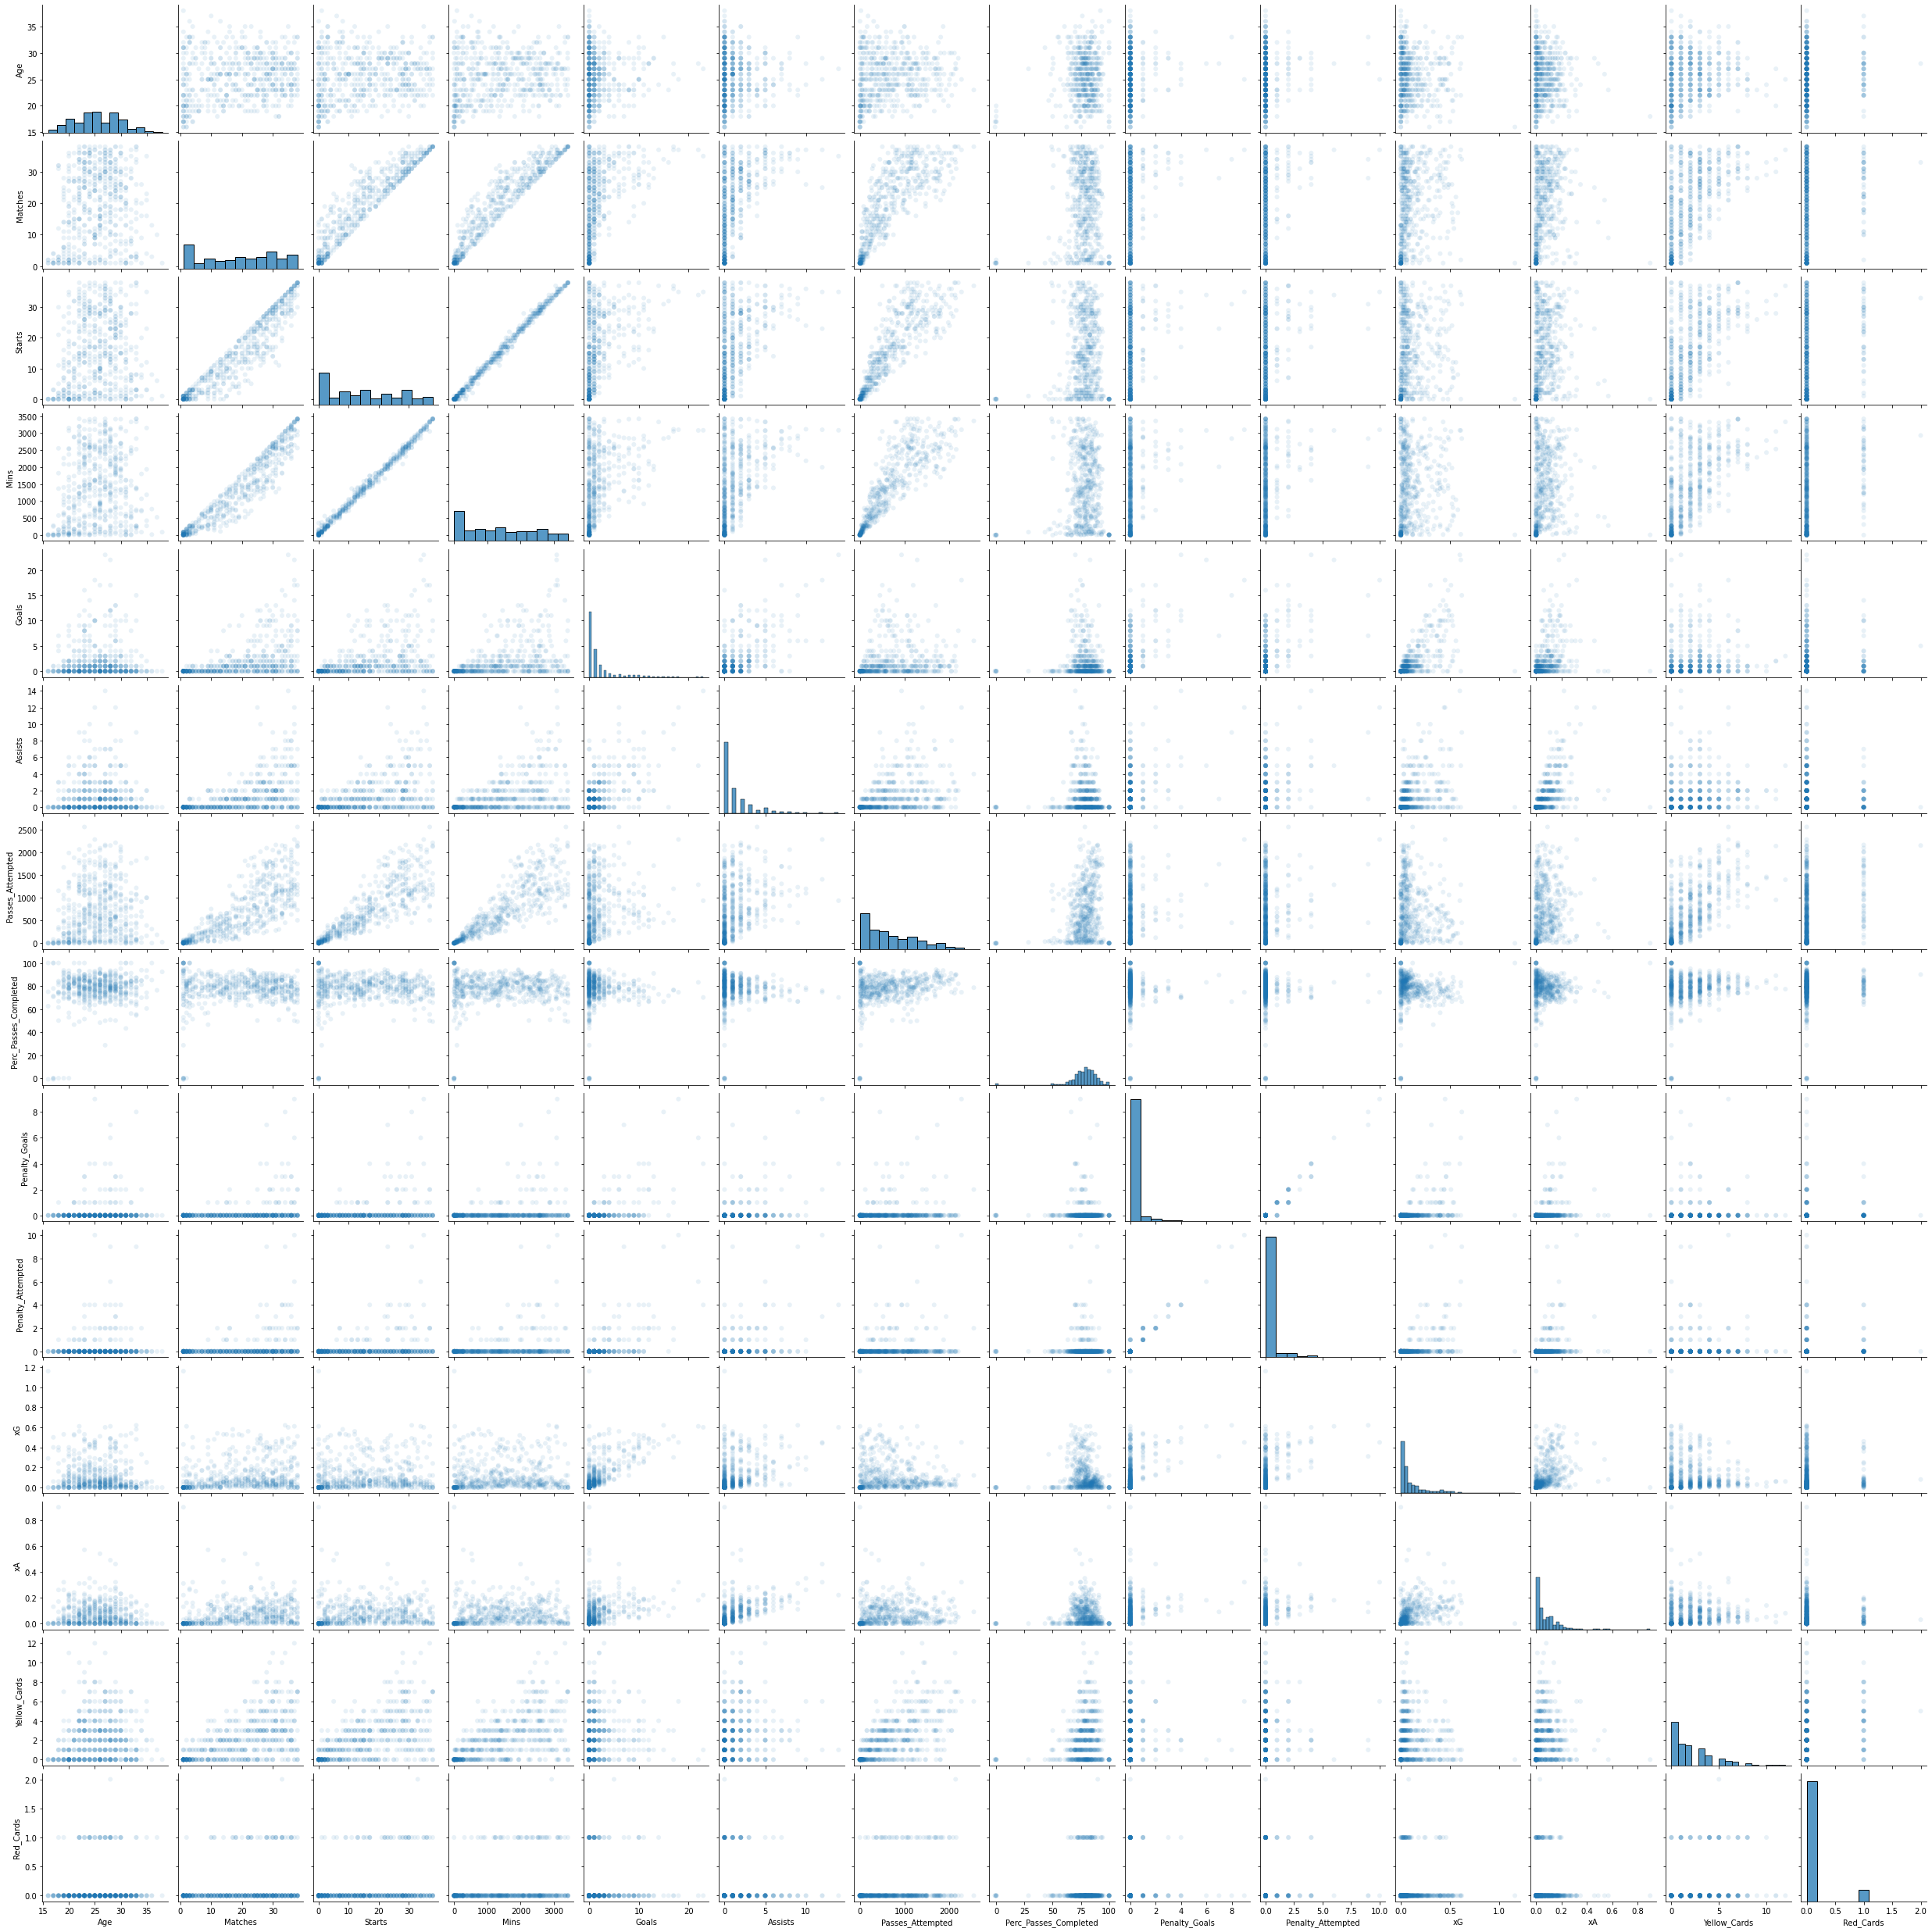

In [ ]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
sns.pairplot(data, hue = 'Club', palette = 'husl')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fae7881c280> (for post_execute):


KeyboardInterrupt: ignored

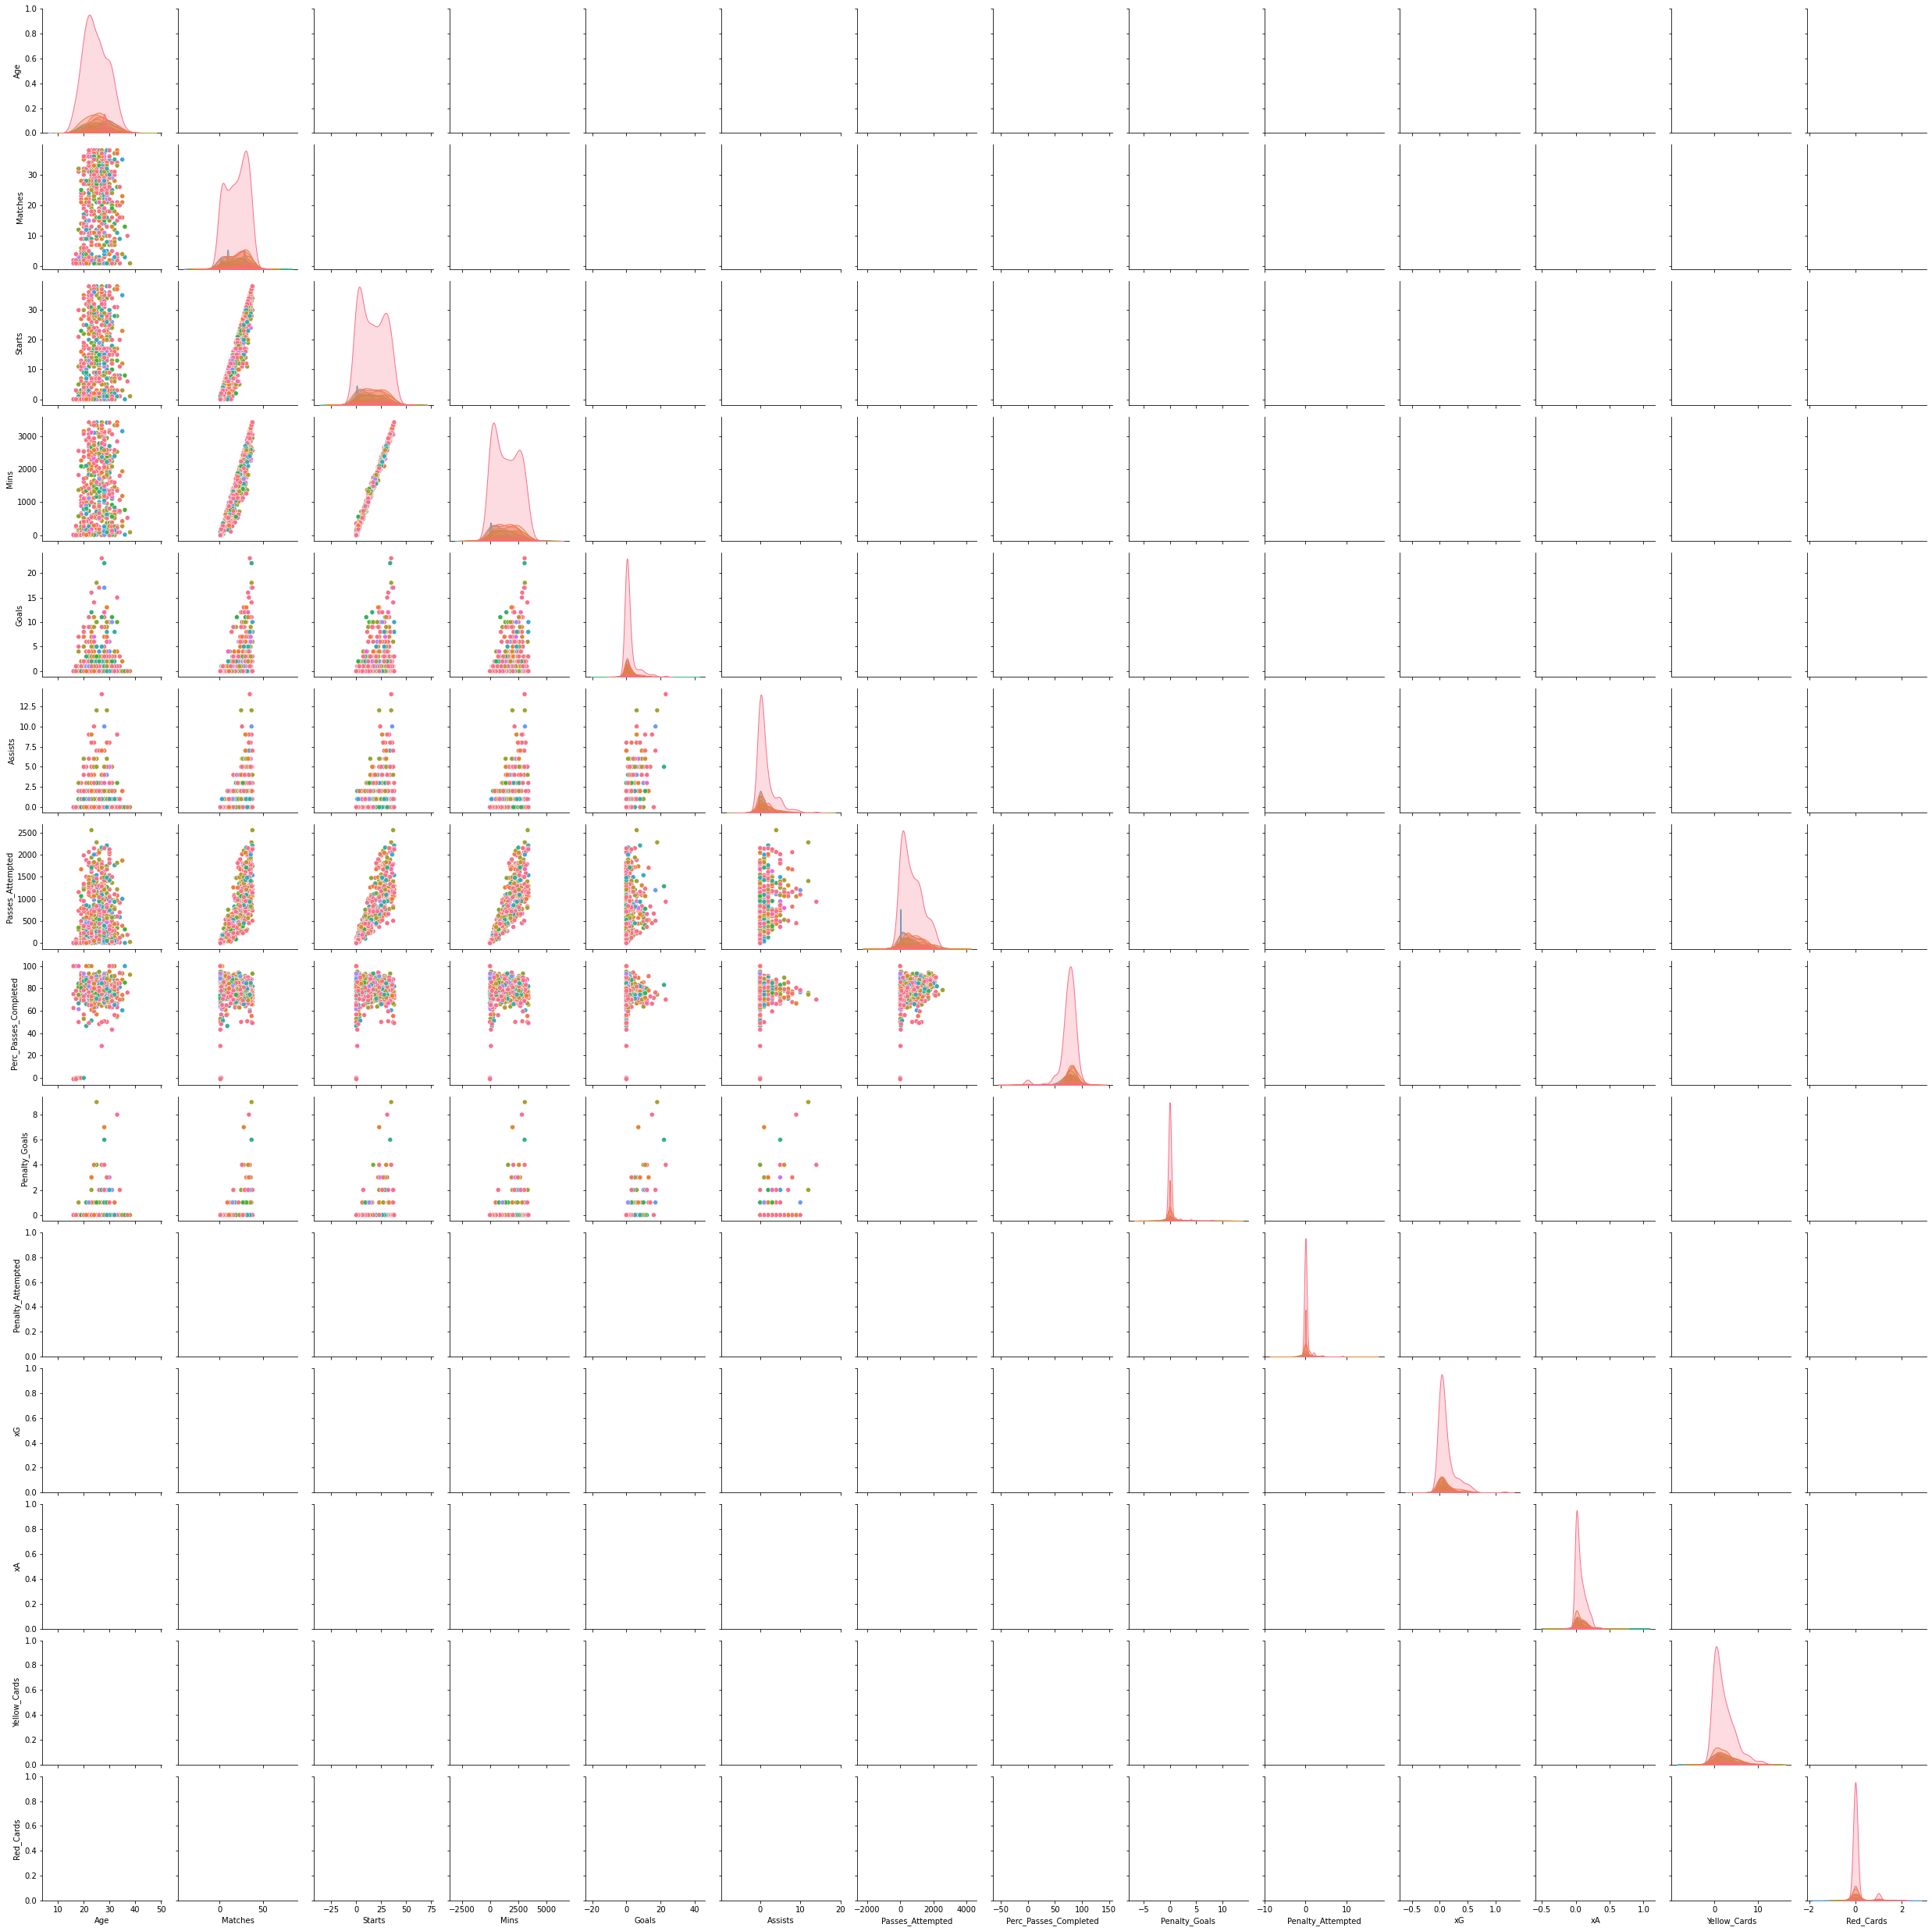

In [ ]:
sns.pairplot(data, hue = 'Nationality', palette = 'husl')